# Demonstration of synchronous average

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [42]:
# Load data
mat_contents = scipy.io.loadmat('D:/data/work_with_Eric/Signal processing for CBM - a tutorial/demo_synchronous_average.mat')
num_pnts_sa_gear = mat_contents['num_pnts_sa_gear'][0][0]
sig_cyc = np.array(mat_contents['sig_cyc'].squeeze())
sig_gear = np.array(mat_contents['sig_gear'].squeeze())

In [43]:
def calc_sa(sig_cyc, sa_len):
    # Calculate the synchronous average.
    
    num_sgmnts = len(sig_cyc) // sa_len
    sig_cyc = sig_cyc[:num_sgmnts * sa_len]
    sigs_mtrx = np.reshape(sig_cyc, (sa_len, num_sgmnts), order='F')  # MATLAB uses Fortran-style column-major order

    sa = np.mean(sigs_mtrx, axis=1)

    return sa

In [44]:
sa = calc_sa(sig_cyc, num_pnts_sa_gear)

In [45]:
# SNR improvement curve
snr_vctr = np.zeros(len(sig_cyc) // num_pnts_sa_gear)
for num_average_sgmnts in range(1, len(sig_cyc) // num_pnts_sa_gear + 1):
    short_sig_cyc = sig_cyc[:num_average_sgmnts * num_pnts_sa_gear]
    short_sa = calc_sa(short_sig_cyc, num_pnts_sa_gear)
    snr = np.sqrt(np.mean(sig_gear**2)) / np.sqrt(np.mean((sig_gear - short_sa)**2))
    snr_vctr[num_average_sgmnts - 1] = snr

In [46]:
# Part for figures
dcyc = 1 / num_pnts_sa_gear  # Cycle resolution
len_cyc = len(sig_cyc)  # Cycle vector length
cyc = np.arange(0, len_cyc * dcyc, dcyc)
cyc_sa = np.arange(0, num_pnts_sa_gear * dcyc, dcyc)

axis_font_size = 10
title_font_size = 15
axis_name_font_size = 13
lgnd_font_size = 10

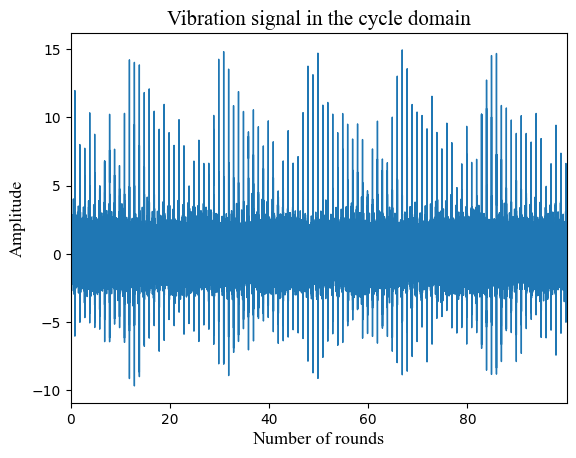

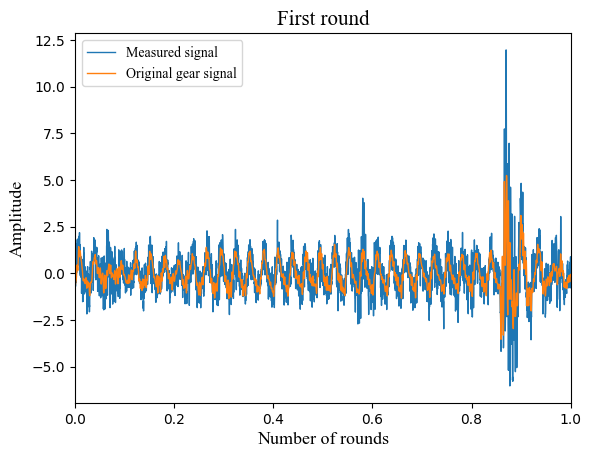

In [47]:
plt.figure()
plt.plot(cyc, sig_cyc, linewidth=1)
plt.title('Vibration signal in the cycle domain', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Number of rounds', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.xlim([0, cyc[-1]])

plt.figure()
plt.plot(cyc[:num_pnts_sa_gear], sig_cyc[:num_pnts_sa_gear], linewidth=1)
plt.plot(cyc[:num_pnts_sa_gear], sig_gear, linewidth=1)
plt.title('First round', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Number of rounds', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
lgnd_font = {'family': 'Times New Roman', 'size': lgnd_font_size}
plt.legend(['Measured signal', 'Original gear signal'], prop=lgnd_font, loc='upper left')
plt.xlim([0, 1])
plt.show()

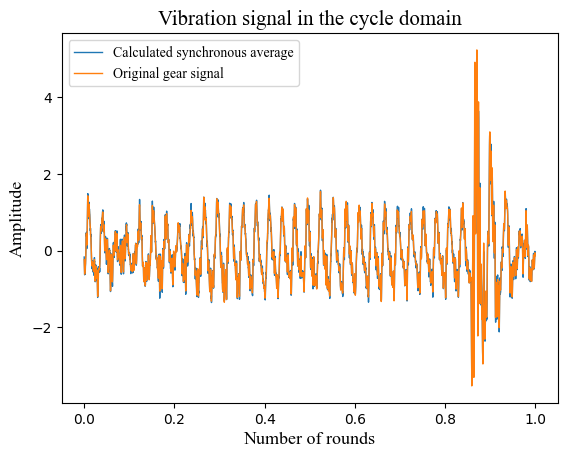

In [48]:
plt.figure()
plt.plot(cyc_sa, sa, linewidth=1)
plt.plot(cyc_sa, sig_gear, linewidth=1)
plt.title('Vibration signal in the cycle domain', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Number of rounds', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('Amplitude', fontname='Times New Roman', fontsize=axis_name_font_size)
lgnd_font = {'family': 'Times New Roman', 'size': lgnd_font_size}
plt.legend(['Calculated synchronous average', 'Original gear signal'], prop=lgnd_font, loc='upper left')
plt.show()

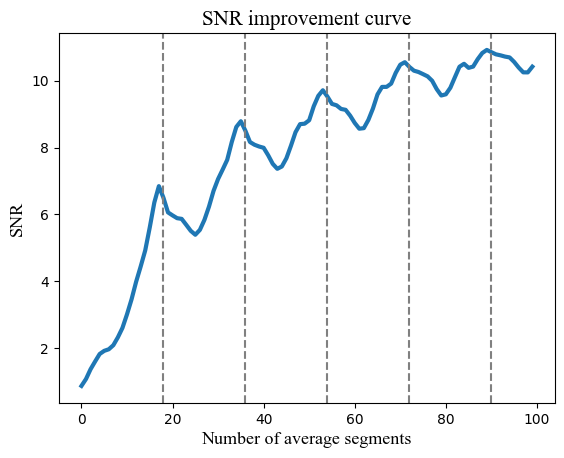

In [49]:
plt.figure()
plt.plot(snr_vctr, linewidth=3)
plt.title('SNR improvement curve', fontname='Times New Roman', fontsize=title_font_size)
plt.xlabel('Number of average segments', fontname='Times New Roman', fontsize=axis_name_font_size)
plt.ylabel('SNR', fontname='Times New Roman', fontsize=axis_name_font_size)
xValues = [18, 36, 54, 72, 90]
for x in xValues:
    plt.axvline(x, color=[0.5, 0.5, 0.5], linestyle='--')

plt.show()